# Проект: анализ оттока клиентов банка

## **Цель проекта** 

Выявить причину повышенного оттока клиентов банка. Выделить сегменты пользователей, по которым отдел маркетинга сможет классифицировать клиентов. А так же дать рекомендации по снижению оттока по каждому сегменту.

## **Задачи проекта**

**Обзор данных**

- Загрузить библиотеки
- Загрузить данные

**Предобработка данных**

- Проверить пропуски в данных
- Проверить на дубликаты
- При необходимости обработать пропуски и дубликаты
- Проверить соответствие типов
- При необходимости скорректировать названия столбцов
- Проверить данные на выбросы и аномалии


**Исследовательский анализ**

- Провести анализ распределения признаков(определяем условия для формирования сегментов)
- Составить портрет клиента уходящего и лояльного
- Корреляционный анализ признака churn с другими признаками

**Статистический анализ данных**

- Основная гипотеза: гипотеза различия дохода между клиентами уходящими и лояльными
- Сформулировать по итогам исследования дополнительные гипотезы

**Сделать промежуточные выводы и подвести итоги**

**Сегментация клиентов и приоритизация сегментов**

**Подготовить рекомендации для работы с отточными сегментами**

## Обзор данных

###  Загрузка библиотек

In [1]:
#импорт библиотек
import pandas as pd
import datetime as dt

#библиотеки для расчета
from numpy import median
import numpy as np
!pip install phik
import phik
import numpy as np
from scipy import stats as st

#графические библиотеки
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.formatter.limits']=(-99,99)
import plotly.express  as px

#библиотека для загрузки данных
import os


import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 686 kB 2.2 MB/s eta 0:00:01


In [2]:
#выбор палитры
sns.set_palette("coolwarm")
sns.color_palette("coolwarm")

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

###  Загрузка данных

In [3]:
# #загрузка данных
   
pth1 = '/datasets/bank_scrooge.csv'
pth2 = 'https://code.s3.yandex.net/datasets/bank_scrooge.csv'


if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Путь не найден')
    

**Описание данных**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- USERID — идентификатор пользователя,
- score — баллы кредитного скоринга,
- city — город,
- gender — пол,
- age — возраст,
- equity — количество баллов собственности
- balance — баланс на счёте,
- products — количество продуктов, которыми пользуется клиент,
- credit_card — есть ли кредитная карта,
- last_activity — активный клиент,
- EST_SALARY — оценочный доход клиента,
- сhurn — признак оттока.

In [4]:
#вывод первых 5 строк таблицы
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


In [5]:
#вывод основной информации о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
#выведем количество пропусков в каждом столбце
data.isna().sum()

USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64

In [7]:
#пропуски в процентном соотношении
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
USERID,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.300000
equity,0.000000
balance,23.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000


In [8]:
initial_rows = data.shape[0]

print('Всего в датасете представлено клиентов:',initial_rows)

Всего в датасете представлено клиентов: 10000


### Вывод

В датасете представлена информация о 10000 клиентах. Предварительное знакомство с данными показало, что есть пропуски в колонках `balance` и `age`. так же не соблюден общий стиль названий столбцов.

## Предобработка данных

Проведем подготовку данных к дальнейшему исследованию. Проверим на наличие дубликатов, пропусков, аномалий.

### Переименуем столбцы

In [9]:
data = data.rename (columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


### Обработка дубликатов

**Проверим на явные дубликаты**

In [10]:
print('Явных дубликатов:', data.duplicated(keep=False).sum())

Явных дубликатов: 0


**Проверим на неявные дубликаты**

Проверим дубликаты по userid

In [11]:
print('Неявных дубликатов:',data.duplicated(subset = ['user_id']).sum())
print('Доля дубликатов от всего датафрейма составила:',\
      round(data.duplicated(subset = ['user_id']).sum()/data.shape[0]*100, 2),'%')
#выведем строки дубликатов
dubl_rows = data[data.duplicated(['user_id'], keep=False)].sort_values(by = 'user_id', ascending = False )
dubl_rows.head(15)

Неявных дубликатов: 73
Доля дубликатов от всего датафрейма составила: 0.73 %


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0
1247,228075,932.0,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
4216,226719,903.0,Рыбинск,Ж,63.0,0,NaN,1,1,0,138582.58,0
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
6412,226550,939.0,Ярославль,М,34.0,0,NaN,1,1,1,145913.73,0
8070,226550,940.0,Рыбинск,М,NaN,0,NaN,1,0,1,147696.95,0
9104,222480,776.0,Рыбинск,Ж,NaN,5,796735.09,1,1,1,55073.63,0
6446,222480,776.0,Ярославль,Ж,38.0,5,823145.83,2,1,1,55777.44,0


По `user_id` найдено 73 дубликата, у клиентов различны пол, город, возраст. По каким причинам задублирован id не ясно и так как вероятно это разные клиенты, удалять не станем.

Далее переведем столбец user_id в индекс

In [12]:
data = data.set_index('user_id').copy()

### Обработка пропусков

В части пропусков будем пользоваться общепринятой классификацией пропусков:
MCAR (Missing Completely At Random / Отсутствует совершенно случайно) — пропуски не зависят от переменных и не ведут к систематической ошибке (смещение, bias), но увеличивают случайную ошибку (разброс, variance), можно их отбрасывать или заполнять, т.к. заполнение не повлияет на характер связи между заполняемой переменной и остальными;

MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать;

MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

Перед обработкой пропусков выясним, к какому типу они относятся, а также как эти пропуски зависят от имеющихся данных - тогда можно будет выбрать более удачную стратегию работы с ними.

**Пропуски в balance**

In [13]:
print('Количество пропусков в balance:',data['balance'].isna().sum())
print('Доля пропусков от всего датафрейма составила:',\
      round(data['balance'].isna().sum()/data.shape[0]*100, 2),'%')

Количество пропусков в balance: 2295
Доля пропусков от всего датафрейма составила: 22.95 %


Игнорировать такое количество пропусков без тщательного анализа не можем. Для начала определим их тип и исследуем зависимость этих пропусков от имеющихся данных. И исходя из результата, определим как с ними работать.

Создадим функцию, которая вернет 1, если пропущено значение в `balance`, и 0, если значение не пропущено. 

In [14]:
def categorize_skip_value(balance):
    if pd.isna(balance):
        return '1'
    else:
        return '0'

Создадим столбец указывающий на пропуски

In [15]:
#применим функцию
data['skip_value'] = data['balance'].apply(categorize_skip_value)
data.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,skip_value
user_id,,,,,,,,,,,,
183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0
146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0
120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1
225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0
157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0


Построим матрицу корреляций и посмотрим, есть ли зависимость между новым признаком и другими признаками таблицы

Считать стандартную корреляцию Пирсона не станем, будем использовать библиотеку phik - она работает сразу со всеми признаками, считая нужный тип корреляции в зависимости от принадлежности признака к той или иной категории. Плюс библиотеки в том, что она улавливает также нелинейные зависимости, минус - не показывает направление зависимости. При использовании phik настроим параметр interval_cols, передав ему список непрерывных признаков: важность этого действия в том, что без явного указания категориальных признаков библиотека пытается определять их самостоятельно и часто делает это плохо, а от принадлежности переменной к определённому типу зависит способ оценки корреляции.

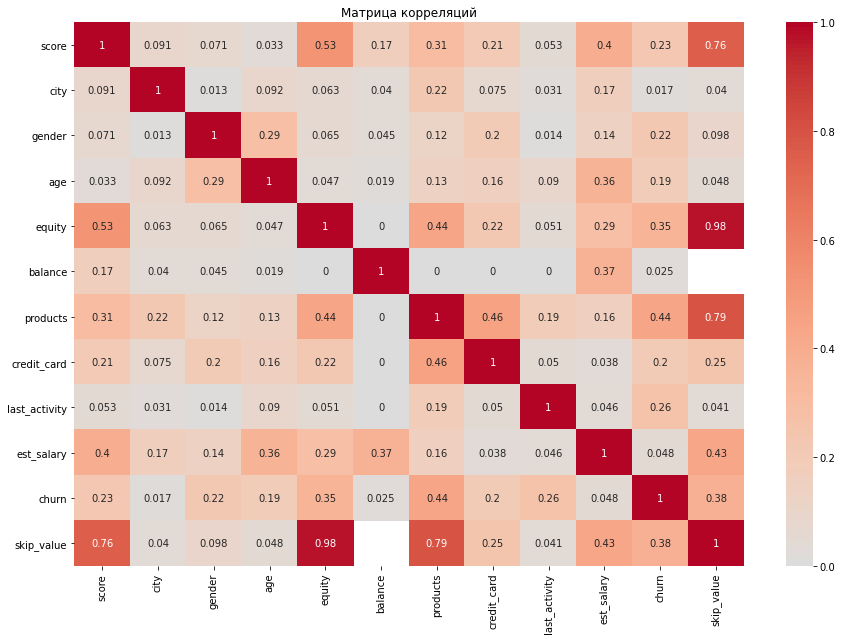

In [16]:
corr = data.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'])

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot = True, cmap='coolwarm', center=0)

plt.title('Матрица корреляций')
plt.show()

Из таблицы видно, что признак наличия/отсутствия пропуска в `balance` коррелирует по шкале Чеддока со следующими значениями:

- score - 0.76, корреляция высокая
- equity - 0.98, корреляция весьма высокая
- products - 0.79, корреляция высокая

Исходя из этого классифицируем пропуски в `balance` по общепринятой классификации, как MNAR(Отсутствует не случайно), и отбрасывать или заполнять не будем.

**Пропуски в age**

In [17]:
print('Количество пропусков в age:',data['age'].isna().sum())
print('Доля пропусков от всего датафрейма составила:',\
      round(data['age'].isna().sum()/data.shape[0]*100, 2),'%')

Количество пропусков в age: 26
Доля пропусков от всего датафрейма составила: 0.26 %


Так же определим их тип и исследуем зависимость пропусков от имеющихся данных. И исходя из результата, определим как с ними работать. Создадим столбец с признаком 1, если пропуск в `age` есть и 0, если нет

In [18]:
#применим функцию
data['skip_value_age'] = data['age'].apply(categorize_skip_value)
data.head()

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,skip_value,skip_value_age
user_id,,,,,,,,,,,,,
183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,0
146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,0
120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,1,0
225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0
157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0


Построим матрицу корреляций и посмотрим, есть ли зависимость между новым признаком и другими признаками таблицы

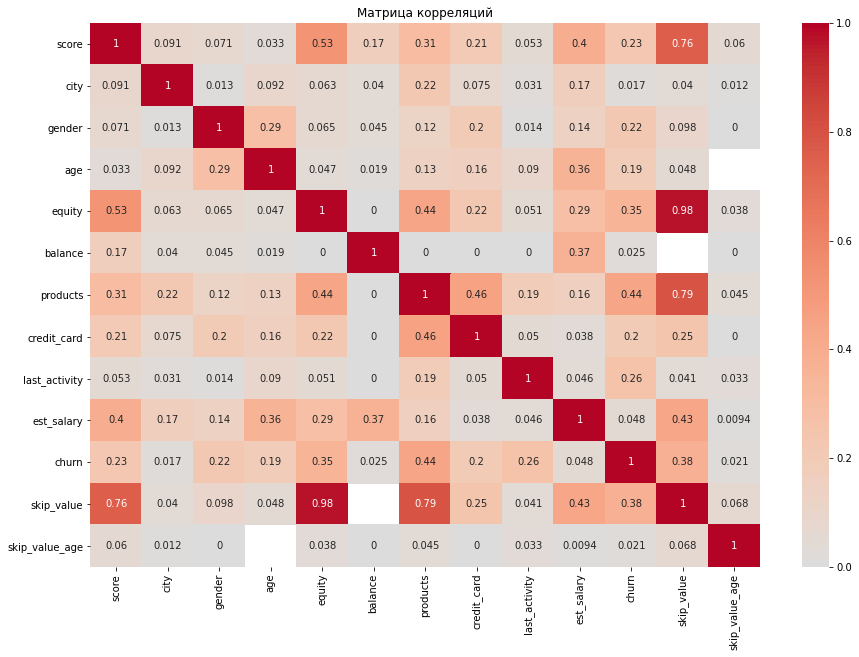

In [19]:
corr = data.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'])

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot = True, cmap='coolwarm', center=0)

plt.title('Матрица корреляций')
plt.show()

Из таблицы видно, что признак наличия/отсутствия пропуска в `age` имеет слабую корреляцию по шкале Чеддока со всеми значениями.

Исходя из того, что пропуски в age имееют слабую корреляцию классифицируем пропуски в `age` по общепринятой классификации, как MCAR(Отсутствует совершенно случайно) в данном случае пропуски удалим.

Такое количество пропусков допустимо удалить.

In [20]:
data = data.dropna(subset=['age']) 

### Выбросы и аномалии

**score**

In [21]:
#данные по столбцу: медиана, среднее, максимальное и минимальное значение 
data['score'].describe()

count    9974.000000
mean      848.682575
std        65.399720
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

Аномальных значений для баллов скоринга нет

**city**

In [22]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

**gender**

In [23]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

**age**

In [24]:
#данные по столбцу: медиана, среднее, максимальное и минимальное значение 
data['age'].describe()

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

Аномальных значений в возрасте клиентов не выявлено

**equity**

In [25]:
data['equity'].unique()

array([1, 5, 0, 4, 3, 2, 6, 7, 8, 9])

**balance**

Выведем общие данные по столбцу: медиана, среднее, максимальное и минимальное значение.

In [26]:
data['balance'].describe()

count    7.695000e+03
mean     8.272456e+05
std      1.980327e+06
min      0.000000e+00
25%      2.956987e+05
50%      5.242953e+05
75%      9.800512e+05
max      1.191136e+08
Name: balance, dtype: float64

**products**

In [27]:
data['products'].unique()

array([2, 3, 1, 4, 5, 0])

Есть клиенты, у которых количество используемых продуктов 0, выведем их.

In [28]:
data[data['products']==0]

,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,skip_value,skip_value_age
user_id,,,,,,,,,,,,,
147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,1,0


Один клиент из всего датасета, скорее всего это ошибка, удалим строку.

In [29]:
data = data.query('products != 0').copy()

**credit_card**

In [30]:
data['credit_card'].unique()

array([0, 1])

**last_activity**

In [31]:
data['last_activity'].unique()

array([1, 0])

**est_salary**

In [32]:
data['est_salary'].describe()

count    9.973000e+03
mean     1.477991e+05
std      1.392871e+05
min      2.546300e+03
25%      7.525202e+04
50%      1.196431e+05
75%      1.745000e+05
max      1.395064e+06
Name: est_salary, dtype: float64

**churn**

In [33]:
data['churn'].unique()

array([1, 0])

Выявлен и удален клиент с количеством используемых продуктов 0, по остальным данным аномалий не выявлено. 

In [34]:
print('После предобработки в датасете осталось', data.shape[0],'клиент')

После предобработки в датасете осталось 9973 клиент


In [35]:
print('В ходе предобработки потеряли',round(((initial_rows - data.shape[0])/initial_rows)*100,2),'% от всего датафрейма')

В ходе предобработки потеряли 0.27 % от всего датафрейма


### Вывод

В ходе предобработки найдены дубликаты в столбце `user_id`, в количестве 0.73% от всего датасета. Принято решение их удалить, т.к. количество не большое. Так же удалены пропуски в столбце `age` их процент составил 0.03% от всего датасета, классифицированны как MCAR (Отсутствует совершенно случайно). Всего удалено 0.27% клиентов от всего датасета. Пропуски в столбце `balance` составили 23% и классифицированы как MNAR(отсутствуют не случайно), т.к. они коррелируют со значениями в `score`, `equity`, `products` и их появление возможно не случайно, принято решение их оставить как есть, чтобы не исказить данные. В остальных столбцах аномалий не выявлено. Отдельные большие и малые значения в `balance` оставим, т.к. в банковском сегменте это допустимо. Так же название столбцов приведено к общему стилю, а значение `user_id` переведено в индекс для повышения производительности производимых расчетов. 

## Исследовательский анализ данных

In [36]:
print('Всего ушедших клиентов:', data[data['churn']==1]['balance'].count())

Всего ушедших клиентов: 1806


### Анализ распределения признаков для оттока

**Баллы скоринга (score)**

Построим гистограмму с графиком плотности распределения, чтобы определить в каком интервале значение `score` характерно для клиентов оттока

In [37]:
custom_palette = ["#75b1e7", "#ffb05e"]

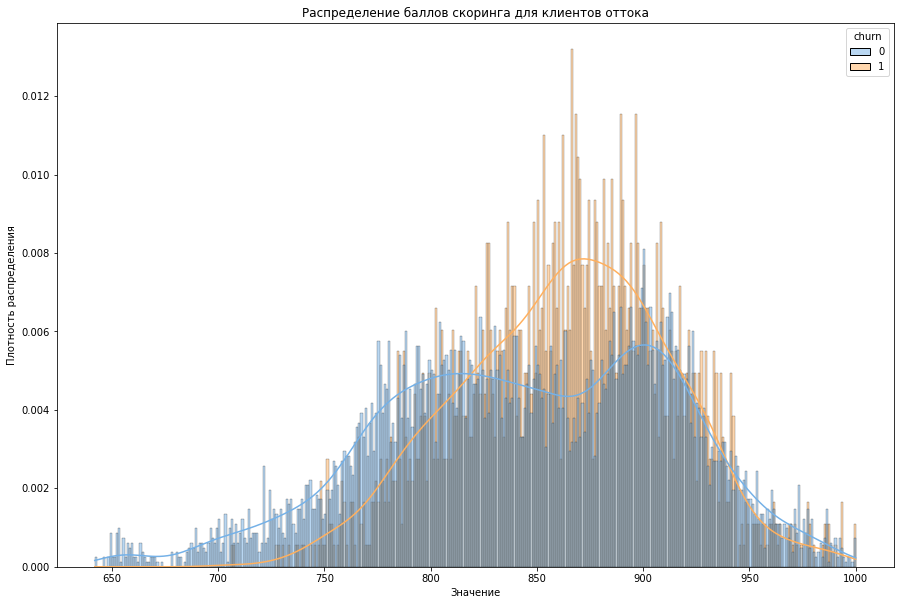

In [38]:
plt.figure(figsize=(15, 10))
sns.histplot(x='score', data=data, hue= 'churn', kde=True, stat="density", common_norm=False, binwidth=1, palette=custom_palette)

plt.title('Распределение баллов скоринга для клиентов оттока')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')

plt.show()

Рассмотрим значения ближе, для определения границ

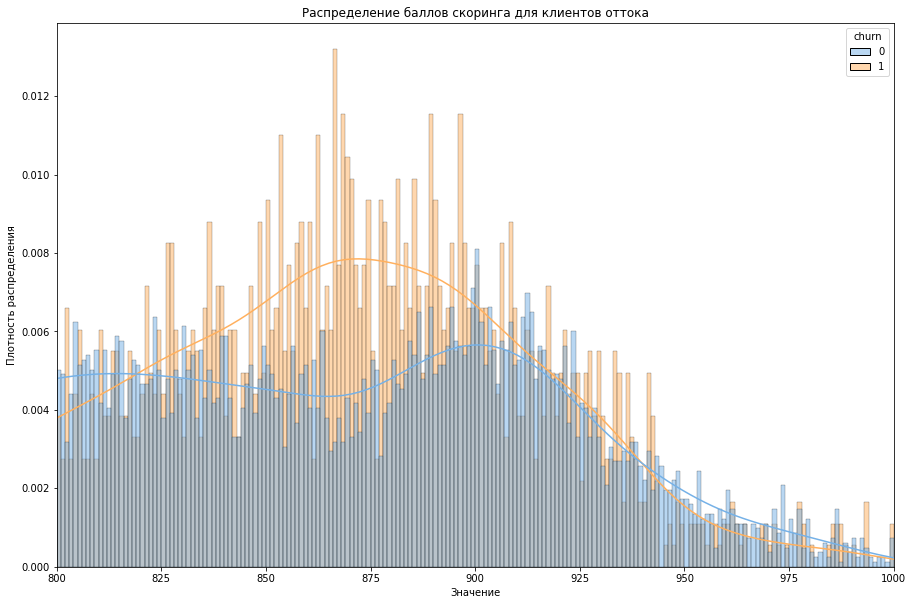

In [39]:
plt.figure(figsize=(15, 10))
sns.histplot(x='score', data=data, hue= 'churn', kde=True, stat="density", common_norm=False, binwidth=1, palette=custom_palette)

plt.title('Распределение баллов скоринга для клиентов оттока')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')
plt.xlim(800, 1000)

plt.show()

Исходя из графика распределения, наиболее высокая плотность значений (и, следовательно, более высокий отток) наблюдается в интервале примерно от 820 до 930.

**Баланс на счете (balance)**

Построим гистограмму с графиком плотности распределения, чтобы определить в каком интервале значение `balance` характерно для клиентов оттока

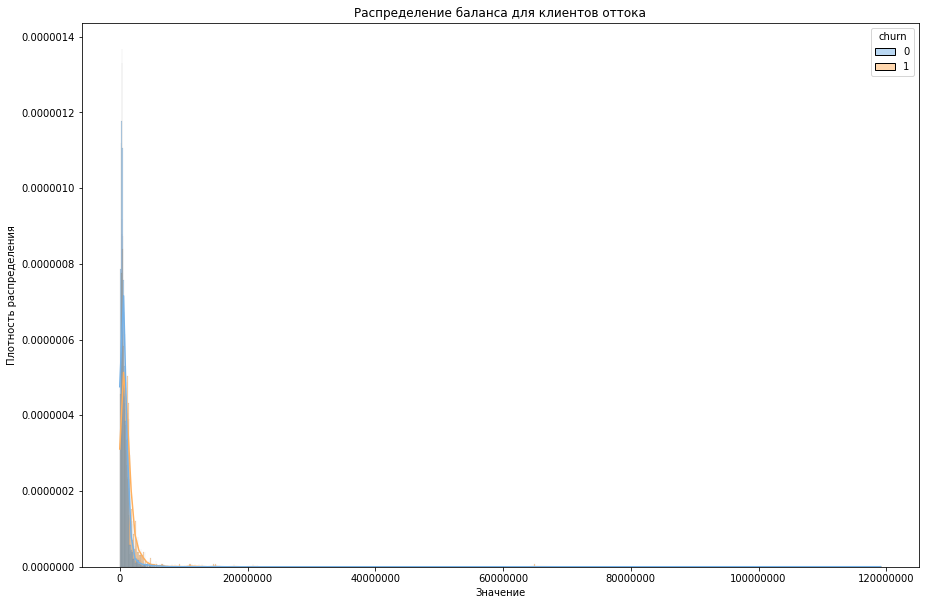

In [40]:
plt.figure(figsize=(15, 10))
sns.histplot(x='balance', data=data, hue= 'churn', kde=True, stat="density", common_norm=False, palette=custom_palette)

plt.title('Распределение баланса для клиентов оттока')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')
#plt.xlim(0, 2000000)

plt.show()

Из-за больших единичных значений в балансе, образовался "хвост", ограничим значение баланса до 10 млн

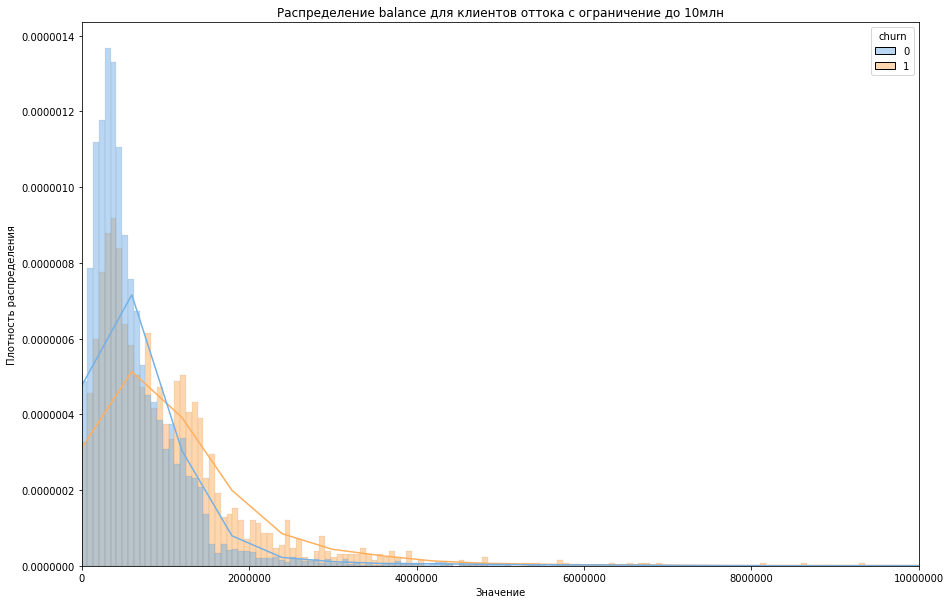

In [41]:
plt.figure(figsize=(15, 10))
sns.histplot(x='balance', data=data, hue= 'churn', kde=True, stat="density", common_norm=False, palette=custom_palette)

plt.title('Распределение balance для клиентов оттока с ограничение до 10млн')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')

plt.xlim(0, 10000000)

plt.show()

ограничим значение баланса до 2 млн, чтобы лучше увидеть значение, где отток выше лояльных клиентов

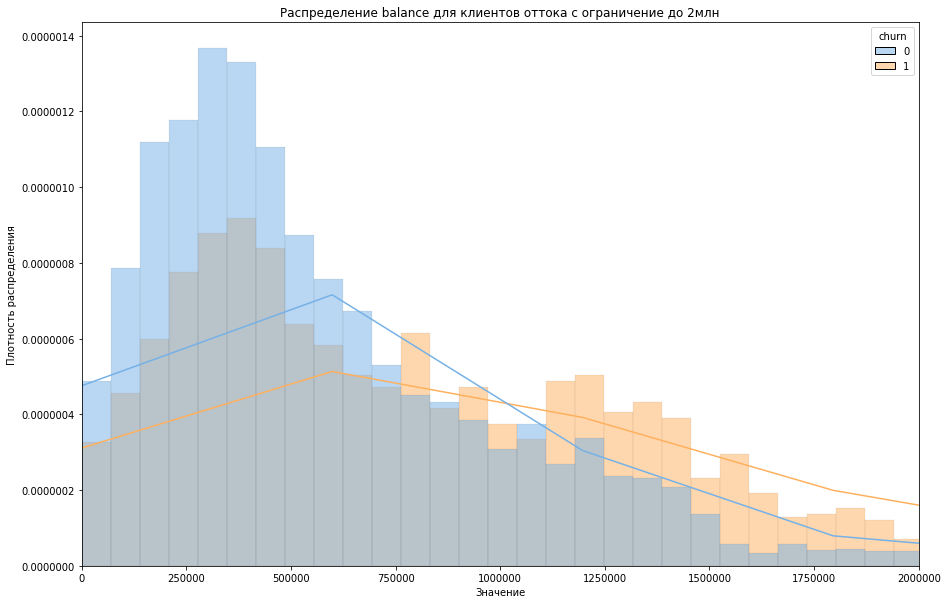

In [42]:
plt.figure(figsize=(15, 10))
sns.histplot(x='balance', data=data, hue= 'churn', kde=True, stat="density", common_norm=False, palette=custom_palette)

plt.title('Распределение balance для клиентов оттока с ограничение до 2млн')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')

plt.xlim(0, 2000000)

plt.show()

Посмотрим на медиану и квартили

In [43]:
description = data[data['churn'] == 1]['balance'].describe()
print(description.apply("{:.2f}".format))

count        1806.00
mean      1134458.21
std       2034445.55
min             6.00
25%        387482.16
50%        783908.90
75%       1348127.55
max      64866210.15
Name: balance, dtype: object


Исходя из данных, баланс клиентов оттока выше лояльных на уровне от 1млн.

**Доход (est_salary)**

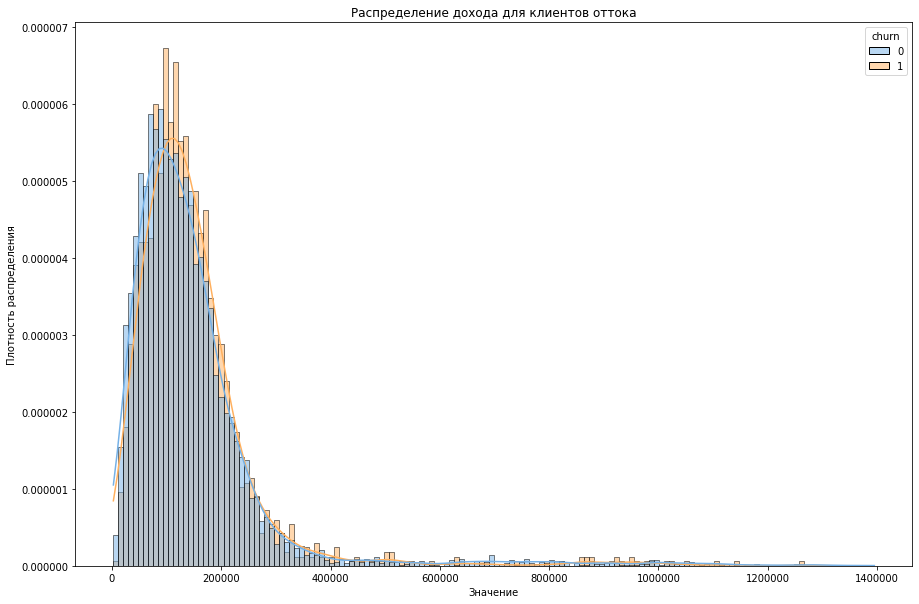

In [44]:
plt.figure(figsize=(15, 10))
sns.histplot(x='est_salary', data=data, hue='churn', kde=True, stat="density", common_norm=False, palette=custom_palette)

plt.title('Распределение дохода для клиентов оттока')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')

#plt.xlim(0, 2000000)

plt.show()

ограничим доход до 300000

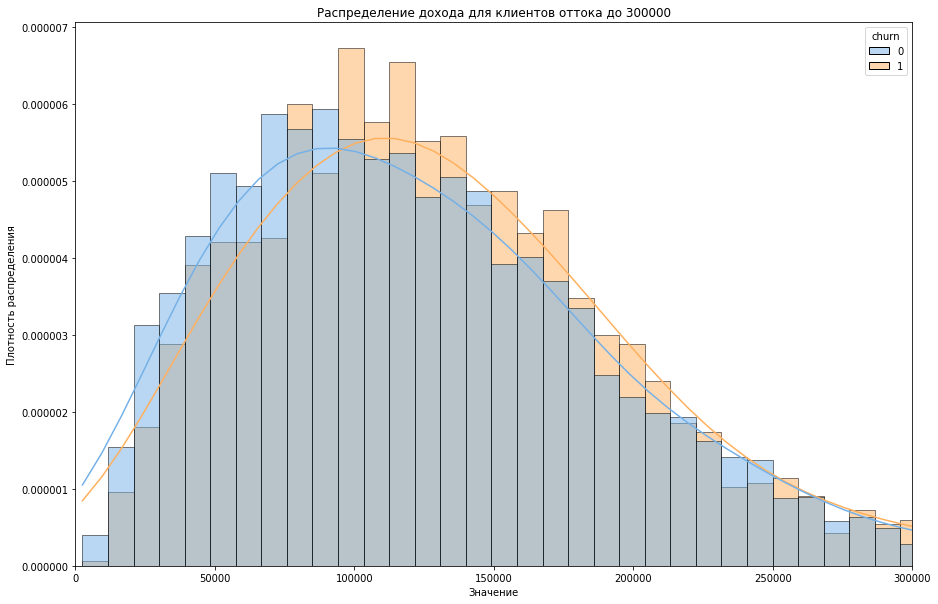

In [45]:
plt.figure(figsize=(15, 10))
sns.histplot(x='est_salary', data=data, hue='churn', kde=True, stat="density", common_norm=False, palette=custom_palette)
plt.title('Распределение дохода для клиентов оттока до 300000')
plt.xlabel('Значение')
plt.ylabel('Плотность распределения')

plt.xlim(0, 300000)

plt.show()

In [46]:
description = data[data['churn'] == 1]['est_salary'].describe()
print(description.apply("{:.2f}".format))

count       1818.00
mean      148357.48
std       122931.98
min        10880.27
25%        83285.66
50%       125408.88
75%       176017.84
max      1263028.49
Name: est_salary, dtype: object


Значение дохода для оттока превыщающее доход лояльных клиентов начинается со 100000.

**Возраст (age)**

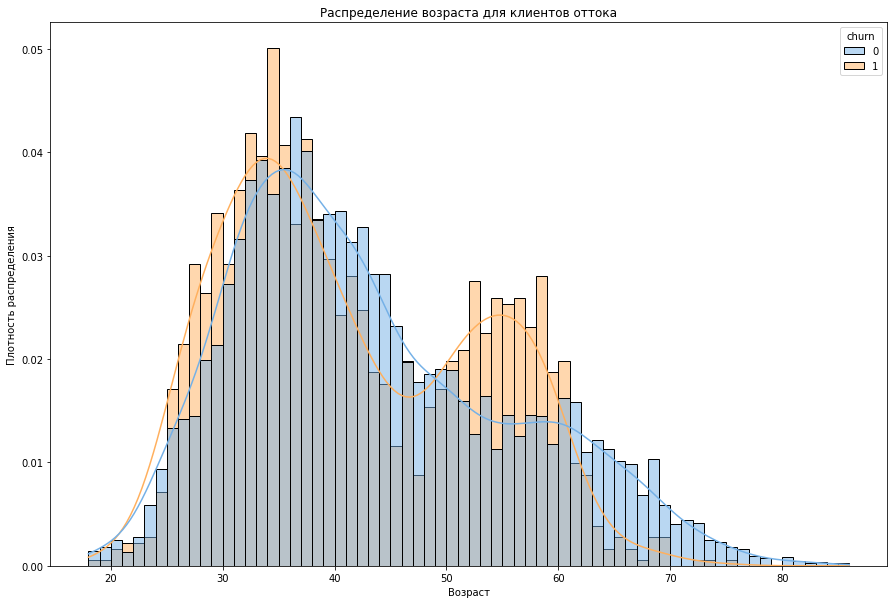

In [47]:
plt.figure(figsize=(15, 10))
sns.histplot(x='age', data=data, hue='churn', kde=True, stat="density", common_norm=False,binwidth=1, palette=custom_palette)

plt.title('Распределение возраста для клиентов оттока')
plt.xlabel('Возраст')
plt.ylabel('Плотность распределения')

plt.show()

Из визуализации видим два пика: Примерно 25-35 лет (основной пик)
и 49-60 лет (второй, меньший пик)

In [48]:
data[data['churn'] == 1]['age'].describe()

count    1818.000000
mean       41.429593
std        11.144754
min        18.000000
25%        32.000000
50%        39.000000
75%        52.000000
max        75.000000
Name: age, dtype: float64

Далее рассмотрим категориальные переменные и сравним средний уровень оттока с разбивкой по категориям со средним уровнем по банку.

In [49]:
#найдем средний уровень оттока по банку
mean_churn = data['churn'].mean().round(2)

**Город (city)**

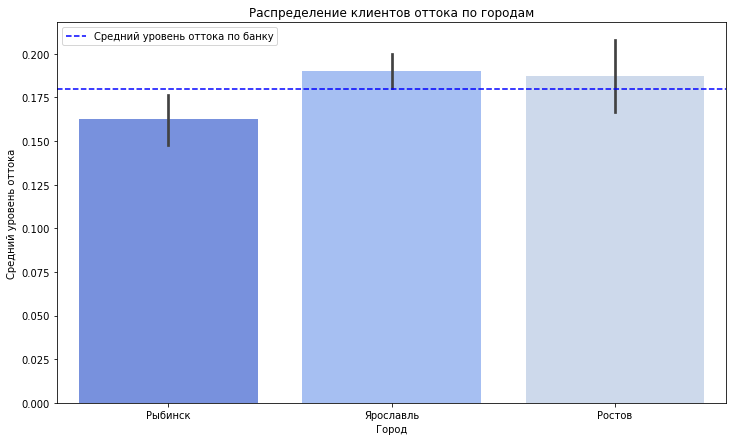

In [50]:
plt.figure(figsize=(12, 7))
sns.barplot(data=data, x='city', y='churn')
plt.axhline(y=mean_churn, color='b', linestyle='--', label='Средний уровень оттока по банку')
plt.legend()
plt.xlabel('Город')
plt.ylabel('Средний уровень оттока')
plt.title('Распределение клиентов оттока по городам')
plt.show()

В Ярославле и Ростове средний отток на одном уровне между собой и выше, чем средний отток по банку.

**Пол (gender)**

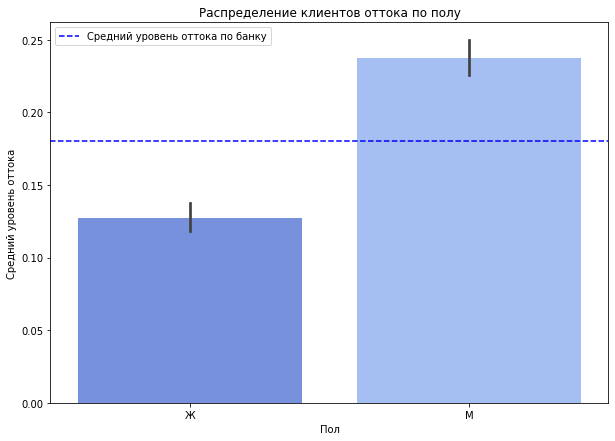

In [51]:
plt.figure(figsize=(10, 7))
sns.barplot(data=data, x='gender', y='churn')
plt.axhline(y=mean_churn, color='b', linestyle='--', label='Средний уровень оттока по банку')
plt.legend()
plt.xlabel('Пол')
plt.ylabel('Средний уровень оттока')
plt.title('Распределение клиентов оттока по полу')
plt.show()

У мужчин средний уровень оттока выше среднего оттока по банку.

**Количество баллов собственности (equity)**  количество баллов собственности

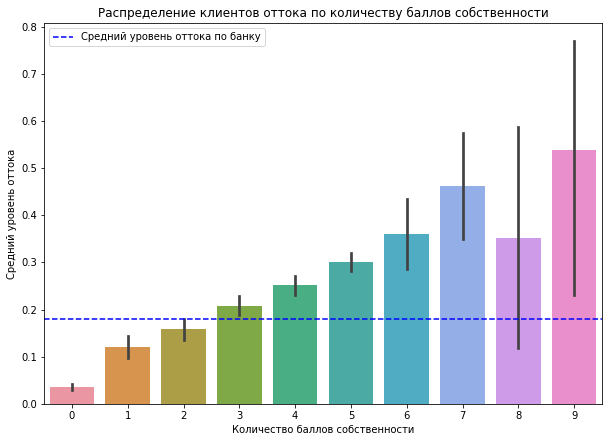

In [52]:
plt.figure(figsize=(10, 7))
sns.barplot(data=data, x='equity', y='churn')
plt.axhline(y=mean_churn, color='b', linestyle='--', label='Средний уровень оттока по банку')
plt.legend()
plt.xlabel('Количество баллов собственности')
plt.ylabel('Средний уровень оттока')
plt.title('Распределение клиентов оттока по количеству баллов собственности')
plt.show()

Из графика можно отметить, что чем выше бал собственности, тем выше значение среднего оттока.

**Количество используемых продуктов (products)**

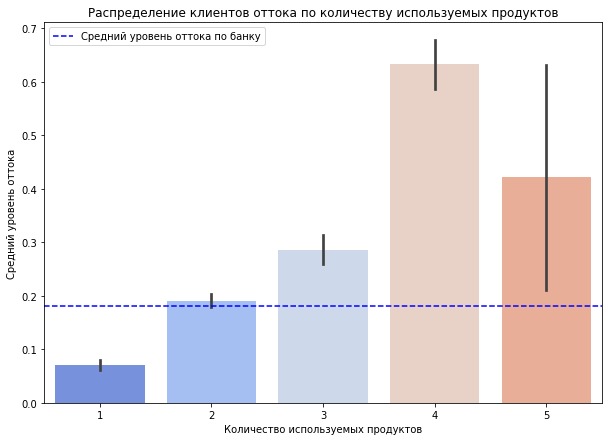

In [53]:
plt.figure(figsize=(10, 7))
sns.barplot(data=data, x='products', y='churn')
plt.axhline(y=mean_churn, color='b', linestyle='--', label='Средний уровень оттока по банку')
plt.legend()
plt.xlabel('Количество используемых продуктов')
plt.ylabel('Средний уровень оттока')
plt.title('Распределение клиентов оттока по количеству используемых продуктов')
plt.show()

Из графика наблюдаем, что клиенты использующие от двух и более продуктов банка склонны к оттоку сильнее. Особенно средний уровень выше у клиентов использующих 4 продукта банка.

**Наличие кредитной карты (credit_card)**

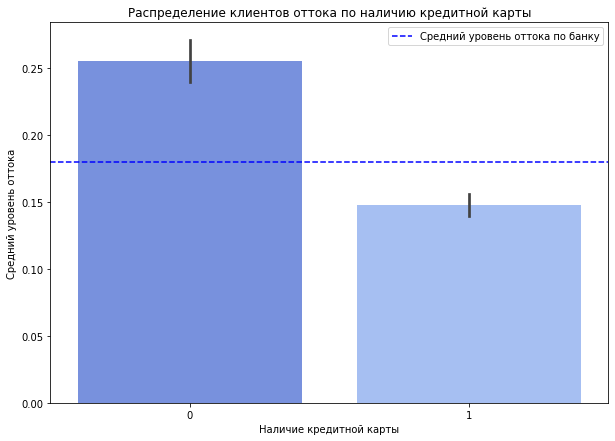

In [54]:
plt.figure(figsize=(10, 7))
sns.barplot(data=data, x='credit_card', y='churn')
plt.axhline(y=mean_churn, color='b', linestyle='--', label='Средний уровень оттока по банку')
plt.legend()
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Средний уровень оттока')
plt.title('Распределение клиентов оттока по наличию кредитной карты')
plt.show()

У клиентов не использующих кредитную средний уровень оттока выше уровня по банку. 

**Активность клиента (last_activity)**

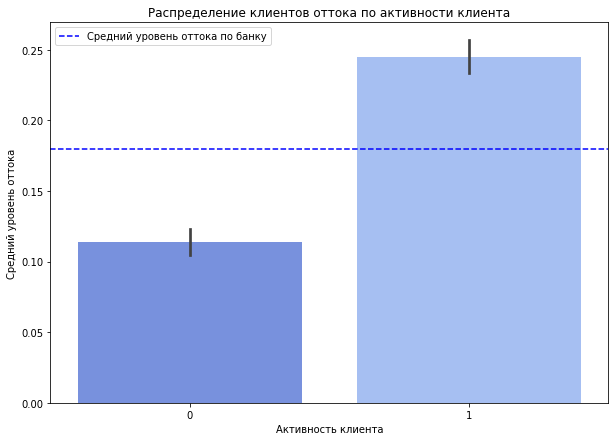

In [55]:
plt.figure(figsize=(10, 7))
sns.barplot(data=data, x='last_activity', y='churn')
plt.axhline(y=mean_churn, color='b', linestyle='--', label='Средний уровень оттока по банку')
plt.legend()
plt.xlabel('Активность клиента')
plt.ylabel('Средний уровень оттока')
plt.title('Распределение клиентов оттока по активности клиента')
plt.show()

У активных клиентов уровень оттока выше среднего по банку.

### Корреляционный анализ признака churn

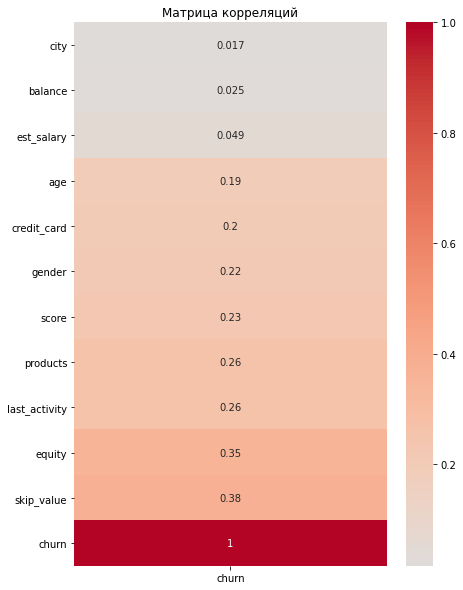

In [56]:
corr = data.phik_matrix(interval_cols=['score', 'age', 'balance', 'est_salary'])

plt.figure(figsize=(7, 10))
sns.heatmap(corr[['churn']].sort_values('churn'), annot=True, cmap='coolwarm',center=0)
plt.title(f'Матрица корреляций')
plt.show()

Признак оттока коррелирует по шкале Чеддока со следующими значениями:

Практически отсутствует:
- city
- balance
- est_salary

Слабая:
- age
- credit_card
- gender
- score 
- products
- last_activity

Умеренная:
- equity

### Портрет клиента

Для отображения портрета клиента характерного для оттока и лояльного клиента, построим таблицу в разрезе оттока, где по каждому признаку будет посчитана мера центральной тенденции. Для сравнения мер центральной тенденции между собой посчитаем относительную разницу между ними.
Для непрерывных/дискретных переменных посчитаем среднее значение. Так же в дополнение к среднему посчитаем медиану из-за наличия выбросов в непрерывных переменных, чтобы понимать, в какой сторону смещено распределение. Для категориальных переменных используем моду. Для медианы и моды более важно само значение, которое они представляют, а не относительная разница с другим значением, поэтому для них относительную разницу считать не будем.

In [57]:

# Создаем таблицу для портрета клиента
portrait_client = pd.DataFrame(columns=['Признак', 'Отток', 'Не отток', 'Относительная разница'])

# Цикл для непрерывных переменных
continuous_vars = ['score', 'est_salary', 'age', 'balance']
for var in continuous_vars:
    churn_mean = data.loc[data['churn'] == 1, var].mean().round(2)
    no_churn_mean = data.loc[data['churn'] == 0, var].mean().round(2)
    rel_diff = ((churn_mean - no_churn_mean) / no_churn_mean).round(2)
    portrait_client = portrait_client.append({'Признак': f'Среднее значение {var}',
                                                  'Отток': churn_mean,
                                                  'Не отток': no_churn_mean,
                                                  'Относительная разница': rel_diff}, ignore_index=True)

    # Добавляем медиану для непрерывных переменных с выбросами
    if var in ['balance', 'est_salary']:
        churn_median = data.loc[data['churn'] == 1, var].median().round(2)
        no_churn_median = data.loc[data['churn'] == 0, var].median().round(2)
        portrait_client = portrait_client.append({'Признак': f'Медиана {var}',
                                                      'Отток': churn_median,
                                                      'Не отток': no_churn_median}, ignore_index=True)

# Цикл для категориальных переменных
categorical_vars = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']
for var in categorical_vars:
    churn_mode = data.loc[data['churn'] == 1, var].mode()[0]
    no_churn_mode = data.loc[data['churn'] == 0, var].mode()[0]
    portrait_client = portrait_client.append({'Признак': f'Мода {var}',
                                                  'Отток': churn_mode,
                                                  'Не отток': no_churn_mode}, ignore_index=True)

portrait_client

,Признак,Отток,Не отток,Относительная разница
0,Среднее значение score,863.36,845.4,0.02
1,Среднее значение est_salary,148357.48,147674.64,0.00
2,Медиана est_salary,125408.88,118227.6,NaN
3,Среднее значение age,41.43,43.02,-0.04
4,Среднее значение balance,1134458.21,733031.63,0.55
5,Медиана balance,783908.9,475410.09,NaN
6,Мода city,Ярославль,Ярославль,NaN
7,Мода gender,М,Ж,NaN
8,Мода equity,5,0,NaN
9,Мода products,2,2,NaN


Из получившейся таблицы опишем типичного клиента оттока и лояльного клиента:

Клиент оттока:

- Возраст - 41 год;
- Пол - Мужской;
- Баллы кредитного скоринга - 863
- Доход - 125408.88	
- Баланс - 783908,90;
- Город Ярославль
- Баллы собственности - 5;
- Количество продуктов - 2;
- Кредитная карта - есть;
- Активность - да;

Лояльный клиент:

- Возраст - 43 год;
- Пол - Женский;
- Баллы кредитного скоринга - 845
- Доход - 118227.6
- Баланс - 475410.09	
- Город Ярославль
- Баллы собственности - 0;
- Количество продуктов - 2;
- Кредитная карта - есть;
- Активность - нет;

## Статистический анализ данных

Далее проведем проверку гипотез.

### **Гипотеза различия дохода между клиентами уходящими и лояльными**

Сформулируем нулевую и альтернативную гипотезы:

$H_{0}$ - Доход у лояльных и уходящих клиентов одинаковый;

$H_{1}$ - Доход у лояльных и уходящих клиентов разный;

Установим уровень статистической значимости = 0.05

Создадим переменные с доходами клиентов оттока и лояльных клиентов.

In [58]:
test_churn = data[data['churn']==1]['est_salary'].copy()
test_loyal = data[data['churn']==0]['est_salary'].copy()

Перед проверкой гипотезы необходимо определить корректный метод тестирования. Так как предпочтительнее провести t-тест Стьюдента, отметим необходимые параметры для его успешного проведения:

- Выборки не зависят друг от друга.

- Выборочные средние нормально распределены
- Дисперсии выборок равны.

При проведении анализа распределения доходов, выяснили, что в данных о доходах имееются выбросы больших размеров, что может повлиять на результаты проверки гипотезы. Исходя из этого следует провести проверку гипотез непараметрическим тестом Уилкоксона-Манна-Уитни.

In [59]:
alpha = 0.05  # критический уровень статистической значимости
results = st.mannwhitneyu(test_churn, test_loyal)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу: разница статистически значима


Согласно тесту, отвергаем нулевую гипотез, есть основания утверждать, что доходы у лояльных клиентов и клиентов оттока разные.

**Гипотеза различия возраста между клиентами уходящими и лояльными**

Сформулируем нулевую и альтернативную гипотезы:

$H_{0}$ - Возраст у лояльных и уходящих клиентов одинаковый;

$H_{1}$ - Возраст у лояльных и уходящих клиентов разный;

Установим уровень статистической значимости = 0.05

Создадим переменные с возрастом клиентов оттока и лояльных клиентов.

In [60]:
test_churn_age = data[data['churn']==1]['age'].copy()
test_loyal_age = data[data['churn']==0]['age'].copy()

Перед проверкой гипотезы необходимо определить корректный метод тестирования. Так как предпочтительнее провести t-тест Стьюдента, отметим необходимые параметры для его успешного проведения:

- Выборки не зависят друг от друга.
- Выборочные средние нормально распределены
- Дисперсии рассматриваемых выборок равны.

Т.к. ttest чувствителен к выбросам проверим их.

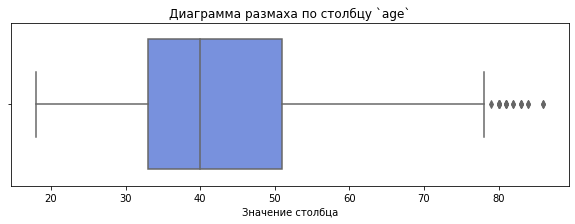

In [61]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=data['age'])
plt.title('Диаграмма размаха по столбцу `age`')
plt.xlabel('Значение столбца')
plt.show()

Выбросы не значительны.

Для корректного проведения t-тест включим параметр equal_var=False, который учитывает различие дисперсий, т.к. размер выборок отличается более чем на 25%. Учитывая большой размер выборки, можно ожидать, что выборочные средние будут распределены приближенно нормально в соответствии с ЦПТ.

In [62]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(test_churn_age,test_loyal_age, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 7.536127357312234e-08
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу, есть основания говорить, что возраст у лояльных и уходящих клиентов разный.

## Вывод

В исследовании выявлены признаки клиентов имеющих показатель оттока выше среднего по банку:
- клиенты с показателем скоринга от 820 до 930 баллов.
- баланс на счете от 1млн.
- доход от 100000
- мужчины
- клиенты с балом собственности от 5 и выше
- клиенты использующие от 2 и более продуктов банка
- клиенты с кредитной картой
- клиенты с высокой активностью
- возраст клиентов 25-35 лет, 49-60 лет

При проведении корреляционного анализа признака оттока, выявлена умеренная корреляция с баллом собственности. По остальным признакам корреляция либо практически отсутствует или слабая.

После проведения статистического анализа есть основания утверждать, что доходы у лояльных клиентов и клиентов оттока разные. А так же есть основания говорить, что возраст у лояльных и уходящих клиентов разный.

## **Сегментация клиентов, приоритизация сегментов, рекомендации по удержанию сегментов.**

Сегментация клиентов будет проводиться на основе выделенных ранее признаков, связанных с повышенным оттоком. Для каждого признака будут определены интервалы значений, включающие наибольший процент отточных клиентов. Сегменты приоритизированны по доле отточных клиентов.

**Сегмент 1**

Признаки:

Пол: мужской

Баланс: больше 1000000

Продукт банка: больше 2

In [63]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №1:', data.query (
    'gender == "М" and products >= 2 and balance >= 1000000')['balance'].count())

# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №1:', data.query (
    'gender == "М" and products >= 2 and balance >= 1000000 and churn==1')['balance'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №1:',(data.query (
    'gender == "М" and products >= 2  and balance >= 1000000 and churn==1')['balance'].count() / data.query (
    'gender == "М" and products >= 2 and balance >= 1000000 ')['balance'].count()*100).round(2))

Общее число пользователей в сегменте №1: 862
Число отточных пользователей в сегменте №1: 449
Доля отточных пользователей в сегменте №1: 52.09


**Рекомендации по удержанию**

Для клиентов данного сегмента предлагаю проводить индивидуальные консультации по инвестированию для увеличения баланса на счете. Возможно предложить услугу персонального менеджера для приоритетного обслуживания и управления балансом. Высылать индивидуальные предложения по отпуску от партнеров банка а так же сопровождение по организации отпуска.

**Сегмент 2**

Признаки:

Баллы скоринга:  820 до 930 

Возраст: 25-35 лет

Пол: мужской

Кредитная карта: есть


In [64]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №2:', data.query (
    'score >=820 and score <= 930 and age>=25 \
    and age<=35 and gender == "М" and credit_card == 1')['balance'].count())

# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №2:', data.query (
    'score >=820 and score <= 930 and age>=25 \
    and age<=35 and gender == "М"  and churn==1 and credit_card == 1')['balance'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №2:',(data.query (
    'score >=820 and score <= 930 and age>=25 \
    and age<=35 and gender == "М"  and churn==1 and credit_card == 1')['balance'].count() / data.query (
    'score >=820 and score <= 930 and age>=25 \
    and age<=35 and gender == "М" and credit_card == 1')['balance'].count()*100).round(2))

Общее число пользователей в сегменте №2: 556
Число отточных пользователей в сегменте №2: 211
Доля отточных пользователей в сегменте №2: 37.95


**Рекомендации по удержанию**

Чем дольше клиент пользуется услугами банка, тем интереснее ему поступают персональные сезонные предложения от партнеров. Плюс предлагать рефинансирование кредита.

**Сегмент 3**

Признаки:

Доход: до 150000

Пол: мужской

Кредитная карта: нет

In [65]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №3:', data.query (
    'est_salary <= 150000 and gender == "М" and credit_card == 0')['balance'].count())

# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №3:', data.query (
    'est_salary <= 150000  and gender == "М"  and credit_card == 0 and churn==1')['balance'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №3:',(data.query (
    'est_salary <= 150000  and gender == "М"  and credit_card == 0 and churn==1')['balance'].count() / data.query (
    'est_salary <= 150000 and gender == "М" and credit_card == 0')['balance'].count()*100).round(2))

Общее число пользователей в сегменте №3: 691
Число отточных пользователей в сегменте №3: 254
Доля отточных пользователей в сегменте №3: 36.76


**Рекомендации по удержанию**

Возможно клиентов в данном случае не устраивают условия использования кредитной карты, для таких клиентов можно ввести упрощенное получения кредитной карты в формате онлайн с увеличенным беспроцентным обслуживанием на 6 месяцев и увеличенным кэшбэком на АЗС и продукты питания. 